In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')



In [3]:
for dirname,_,filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

In [4]:
%time data = pd.read_csv('./data.csv')
print(data.shape)

Wall time: 324 ms
(18207, 89)


In [5]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [7]:
# 检查数据包含的空值
data.isnull().sum()

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST            

In [8]:
# 为正确的数据可视化填充连续变量的缺失值

data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'], inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)
data['Weight'].fillna('200lbs', inplace = True)
data['Contract Valid Until'].fillna(2019, inplace = True)
data['Height'].fillna("5'11", inplace = True)
data['Loaned From'].fillna('None', inplace = True)
data['Joined'].fillna('Jul 1, 2018', inplace = True)
data['Jersey Number'].fillna(8, inplace = True)
data['Body Type'].fillna('Normal', inplace = True)
data['Position'].fillna('ST', inplace = True)
data['Club'].fillna('No Club', inplace = True)
data['Work Rate'].fillna('Medium/ Medium', inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)
data['Weak Foot'].fillna(3, inplace = True)
data['Preferred Foot'].fillna('Right', inplace = True)
data['International Reputation'].fillna(1, inplace = True)
data['Wage'].fillna('€200K', inplace = True)

In [9]:
data.fillna(0,inplace=True)

In [10]:
def defending(data):
    return int(round((data[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))
def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))

In [14]:
# 重命名
data.rename(columns={'Club Logo':'Club_Logo'},inplace=True)

data['Defending'] = data.apply(defending, axis = 1)
data['General'] = data.apply(general, axis = 1)
data['Mental'] = data.apply(mental, axis = 1)
data['Passing'] = data.apply(passing, axis = 1)
data['Mobility'] = data.apply(mobility, axis = 1)
data['Power'] = data.apply(power, axis = 1)
data['Rating'] = data.apply(rating, axis = 1)
data['Shooting'] = data.apply(shooting, axis = 1)


In [15]:
players = data[['Name','Defending','General','Mental','Passing',
                'Mobility','Power','Rating','Shooting','Flag','Age',
                'Nationality', 'Photo', 'Club_Logo', 'Club']]

players.head()

,Name,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting,Flag,Age,Nationality,Photo,Club_Logo,Club
0,L. Messi,29,89,71,87,91,74,94,88,https://cdn.sofifa.org/flags/52.png,31,Argentina,https://cdn.sofifa.org/players/4/19/158023.png,https://cdn.sofifa.org/teams/2/light/241.png,FC Barcelona
1,Cristiano Ronaldo,27,88,73,81,91,83,94,88,https://cdn.sofifa.org/flags/38.png,33,Portugal,https://cdn.sofifa.org/players/4/19/20801.png,https://cdn.sofifa.org/teams/2/light/45.png,Juventus
2,Neymar Jr,28,85,72,80,94,69,92,84,https://cdn.sofifa.org/flags/54.png,26,Brazil,https://cdn.sofifa.org/players/4/19/190871.png,https://cdn.sofifa.org/teams/2/light/73.png,Paris Saint-Germain
3,De Gea,16,26,43,39,66,54,92,21,https://cdn.sofifa.org/flags/45.png,27,Spain,https://cdn.sofifa.org/players/4/19/193080.png,https://cdn.sofifa.org/teams/2/light/11.png,Manchester United
4,K. De Bruyne,59,79,81,92,81,76,92,85,https://cdn.sofifa.org/flags/7.png,27,Belgium,https://cdn.sofifa.org/players/4/19/192985.png,https://cdn.sofifa.org/teams/2/light/10.png,Manchester City


In [16]:
import requests
import random
from math import pi

import matplotlib.image as mpimg
from matplotlib.offsetbox import (OffsetImage,AnnotationBbox)

In [37]:
def details(row,title,image,age,nationality,photo,logo,club):
    flag_image ="img_flag.jpg"
    player_image ="img_player.jpg"
    logo_image ="img_club_logo.jpg"
    
    img_flag = requests.get(image).content
    with open(flag_image,'wb') as handler:
        handler.write(img_flag)
        
    player_img = requests.get(photo).content 
    with open(player_image,'wb') as handler:
        handler.write(player_img)
        
    logo_img = requests.get(logo).content
    with open(logo_image,'wb') as handler:
        handler.write(logo_img)
    
    r = lambda: random.randint(0,255)
    colorRandom ='#%02X%02X%02X'%(r(),r(),r())
    
    if colorRandom =='#ffffff':colorRandom = '#a5d6a7'
        
    basic_color ='#37474f'
    color_annotate ='#01579b'
    
    img = mpimg.imread(flag_image)
    
    plt.figure(figsize=(15,8))
    categories=list(players)[1:]
    coulumnDontUseGraph = ['Flag','Age','Nationality','Photo','Logo','Club']
    N = len(categories) - len(coulumnDontUseGraph)
    
    angles = [n/float(N)*2*pi for n in range(N)]
    angles += angles[:1]
    
    ax = plt.subplot(111,projection='polar')
    ax.set_theta_offset(pi/2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1],categories,color='black',size=17)
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75,100],["25","50","75","100"],color=basic_color,size=10)
    plt.ylim(0,100)
    
    values = players.loc[row].drop('Name').values.flatten().tolist()
    valuesDontUseGraph = [image,age,nationality,photo,logo,club]
    values =[e for e in values if e not in(valuesDontUseGraph)]
    values += values[:1]
    
    ax.plot(angles, values, color= basic_color, linewidth=1, linestyle='solid')
    ax.fill(angles, values, color= colorRandom, alpha=0.5)
    axes_coords = [0, 0, 1, 1]
    ax_image = plt.gcf().add_axes(axes_coords,zorder= -1)
    ax_image.imshow(img,alpha=0.5)
    ax_image.axis('off')
    
    ax.annotate('Nationality: ' + nationality.upper(), xy=(10,10), xytext=(103, 138),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
                      
    ax.annotate('Age: ' + str(age), xy=(10,10), xytext=(43, 180),
                fontsize= 15,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
    
    ax.annotate('Team: ' + club.upper(), xy=(10,10), xytext=(92, 168),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})

    arr_img_player = plt.imread(player_image, format='jpg')

    imagebox_player = OffsetImage(arr_img_player)
    imagebox_player.image.axes = ax
    abPlayer = AnnotationBbox(imagebox_player, (0.5, 0.7),
                        xybox=(313, 223),
                        xycoords='data',
                        boxcoords="offset points"
                        )
    arr_img_logo = plt.imread(logo_image, format='jpg')

    imagebox_logo = OffsetImage(arr_img_logo)
    imagebox_logo.image.axes = ax
    abLogo = AnnotationBbox(imagebox_logo, (0.5, 0.7),
                        xybox=(-320, -226),
                        xycoords='data',
                        boxcoords="offset points"
                        )

    ax.add_artist(abPlayer)
    ax.add_artist(abLogo)

    plt.title(title, size=50, color= basic_color)

In [38]:
def graphPolar(id =0):
    if 0 <= id < len(data.ID):
        details(row = players.index[id],
        title = players["Name"][id],
        age = players['Age'][id],
        photo = players['Photo'][id],
        nationality = players['Nationality'][id],
        image = players['Flag'][id],
        logo = players['Club_Logo'][id],
        club = players['Club'][id])
    else:
        print('The base has 17917 players. You can put positive numbers from 0 to 17917')

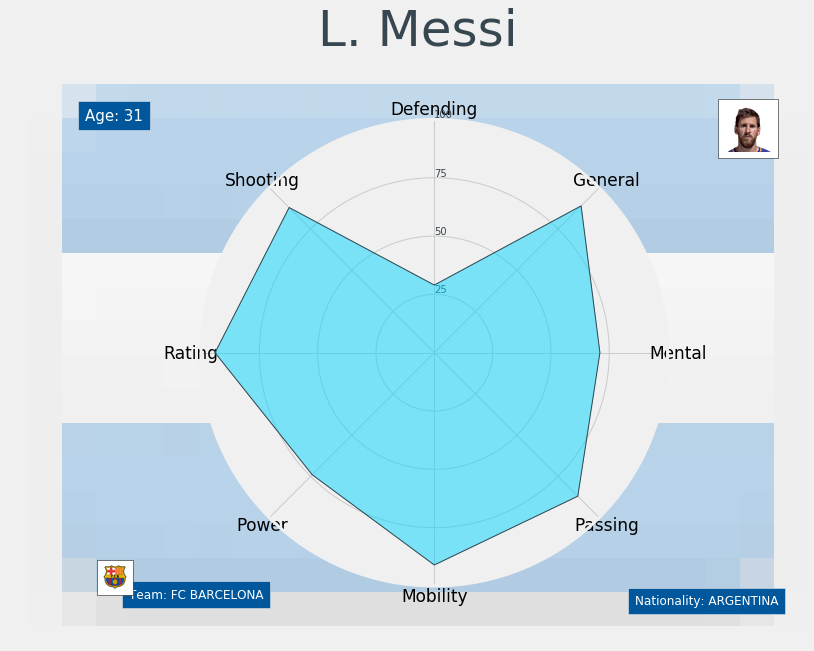

In [39]:
graphPolar(0)

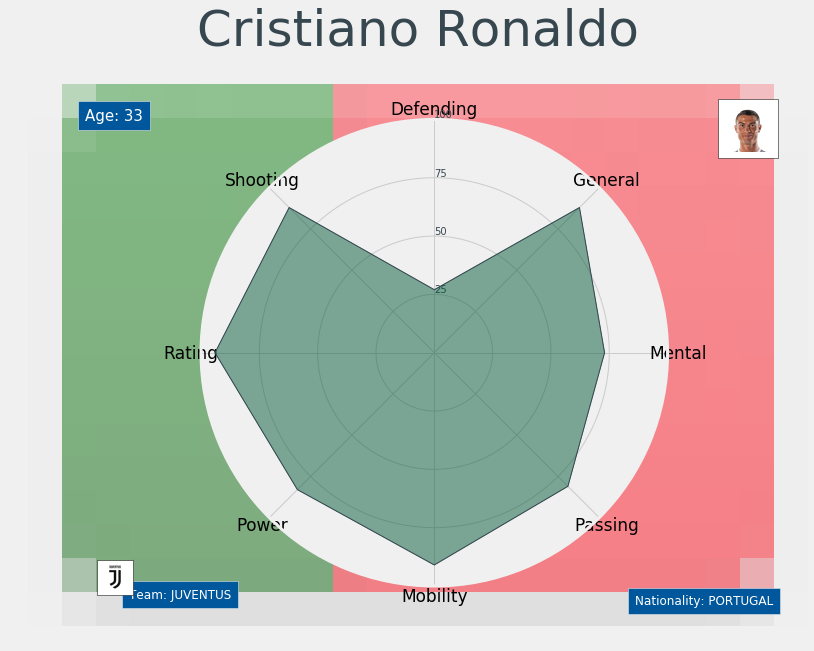

In [40]:
graphPolar(1)

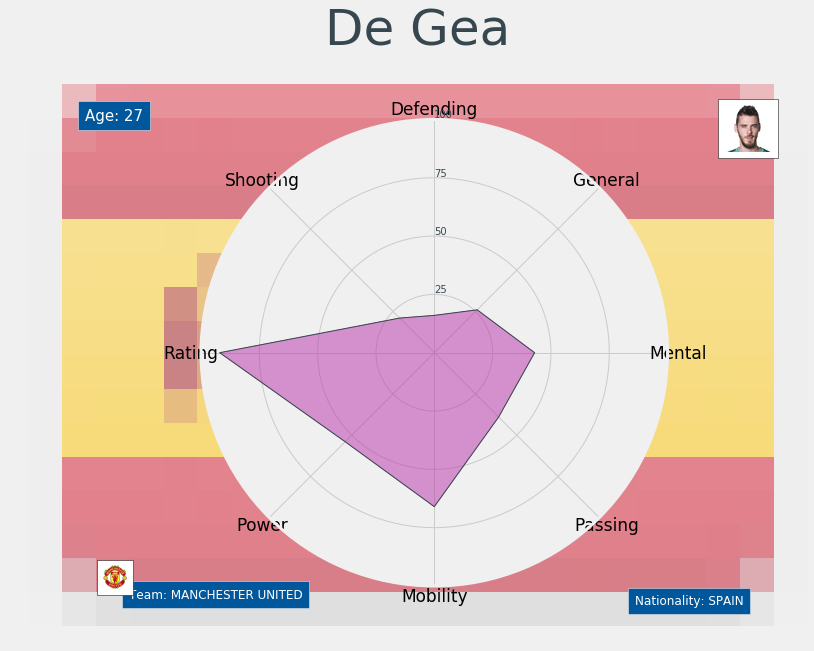

In [41]:
graphPolar(3)

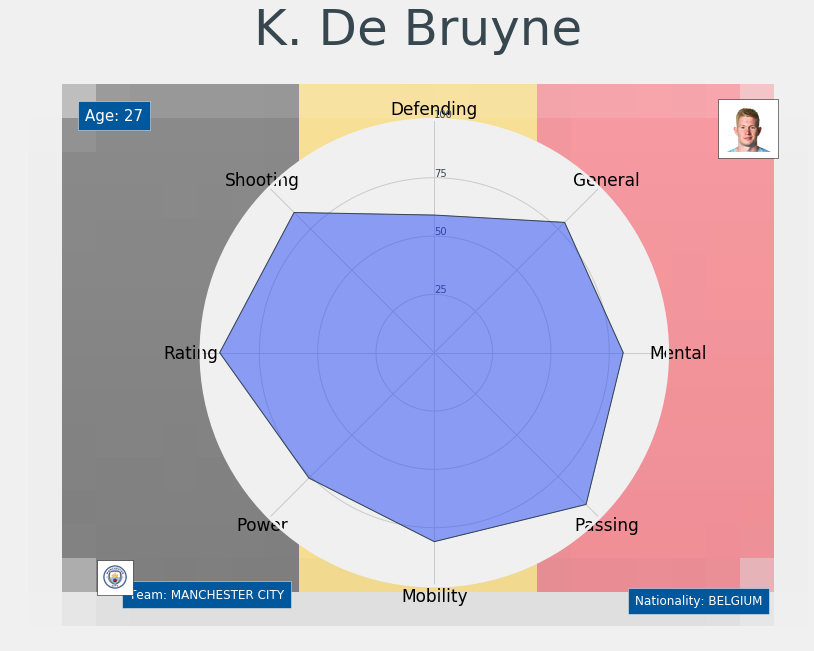

In [42]:
graphPolar(4)

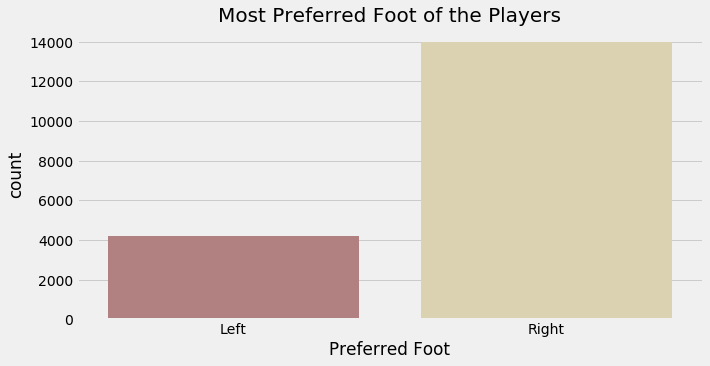

In [44]:
plt.rcParams['figure.figsize']=(10,5)
sns.countplot(data['Preferred Foot'],palette='pink')
plt.title('Most Preferred Foot of the Players', fontsize = 20)
plt.show()

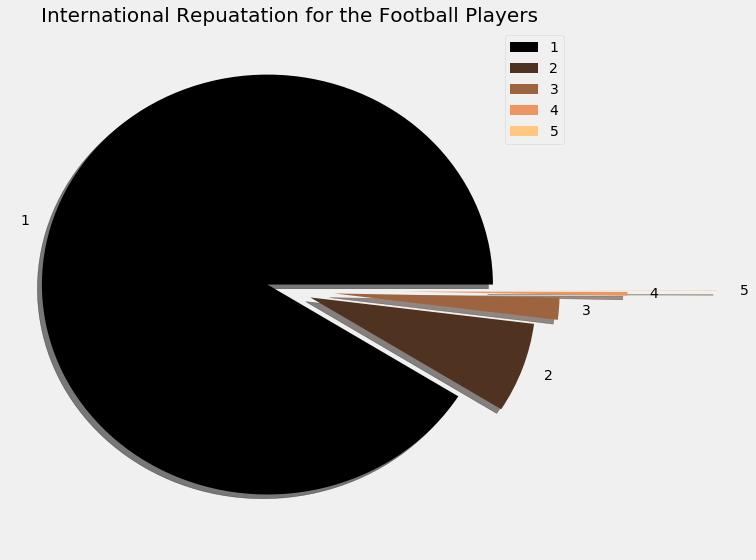

In [51]:
# 用饼图表示国际声誉的份额

labels = ['1', '2', '3', '4', '5']
sizes = data['International Reputation'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0.1, 0.1, 0.2, 0.5, 0.9]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('International Repuatation for the Football Players', fontsize = 20)
plt.legend()
plt.show()

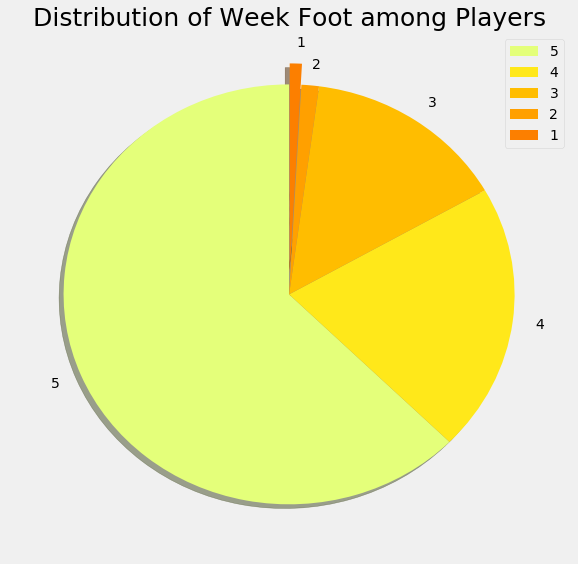

In [52]:
# 绘制饼状图来表示球员Week Foot的比例

labels = ['5', '4', '3', '2', '1'] 
size = data['Weak Foot'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0, 0, 0, 0.1]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Week Foot among Players', fontsize = 25)
plt.legend()
plt.show()

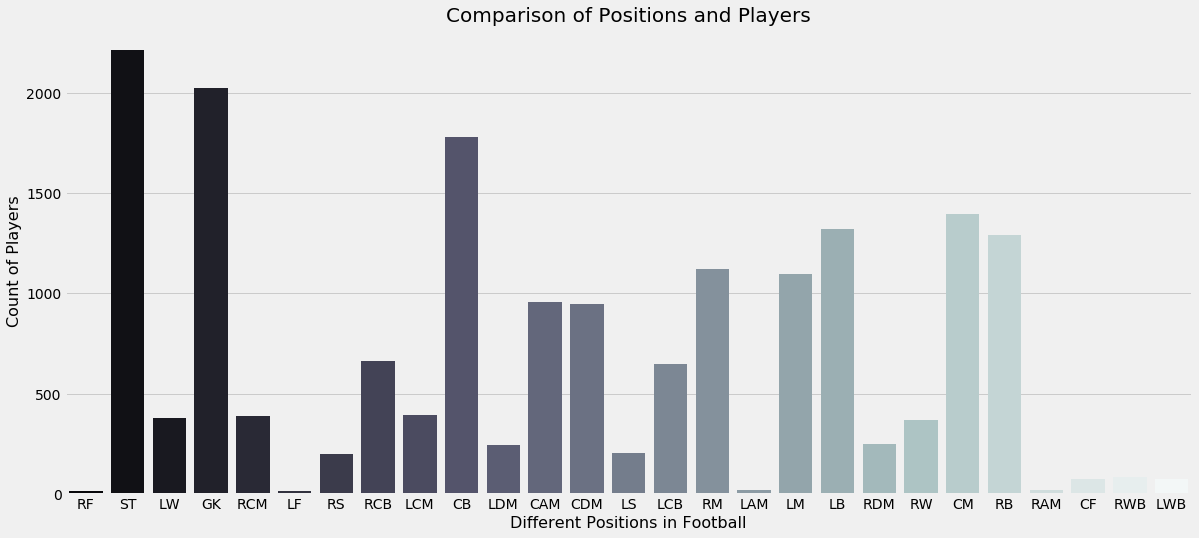

In [53]:
# 球员不同的位置

plt.figure(figsize = (18, 8))
plt.style.use('fivethirtyeight')
ax = sns.countplot('Position', data = data, palette = 'bone')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

In [54]:
# 定义用于清洗权重数据的函数

def extract_value_from(value):
  out = value.replace('lbs', '')
  return float(out)

# 将该函数应用于权重列
#data['value'] = data['value'].apply(lambda x: extract_value_from(x))
data['Weight'] = data['Weight'].apply(lambda x : extract_value_from(x))

data['Weight'].head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

In [55]:
# 定义一个清除工资列的函数

def extract_value_from(Value):
    out = Value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in Value:
        out = float(out.replace('K', ''))*1000
    return float(out)

In [56]:
# 将该函数应用于工资列

data['Value'] = data['Value'].apply(lambda x: extract_value_from(x))
data['Wage'] = data['Wage'].apply(lambda x: extract_value_from(x))

data['Wage'].head()

0    565000.0
1    405000.0
2    290000.0
3    260000.0
4    355000.0
Name: Wage, dtype: float64

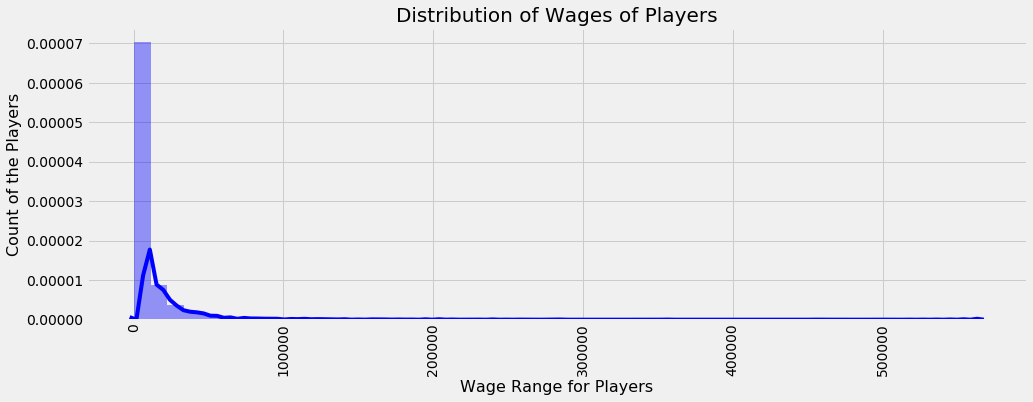

In [57]:
# 比较球员的工资

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(data['Wage'], color = 'blue')
plt.xlabel('Wage Range for Players', fontsize = 16)
plt.ylabel('Count of the Players', fontsize = 16)
plt.title('Distribution of Wages of Players', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

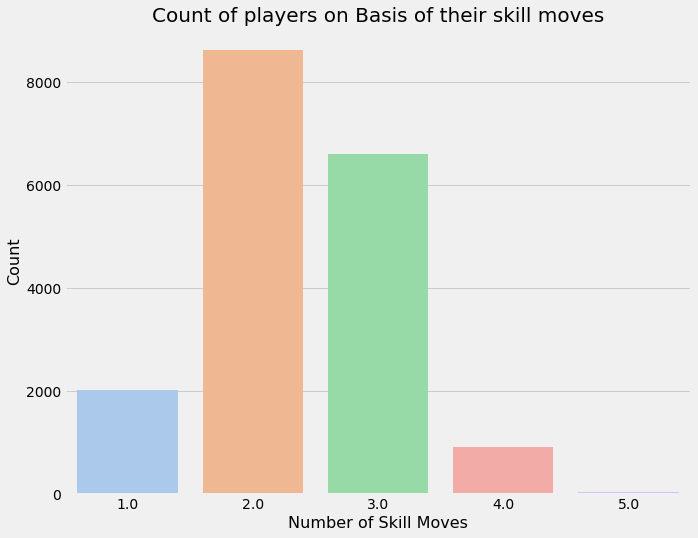

In [58]:
# 玩家技能动作

plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'Skill Moves', data = data, palette = 'pastel')
ax.set_title(label = 'Count of players on Basis of their skill moves', fontsize = 20)
ax.set_xlabel(xlabel = 'Number of Skill Moves', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

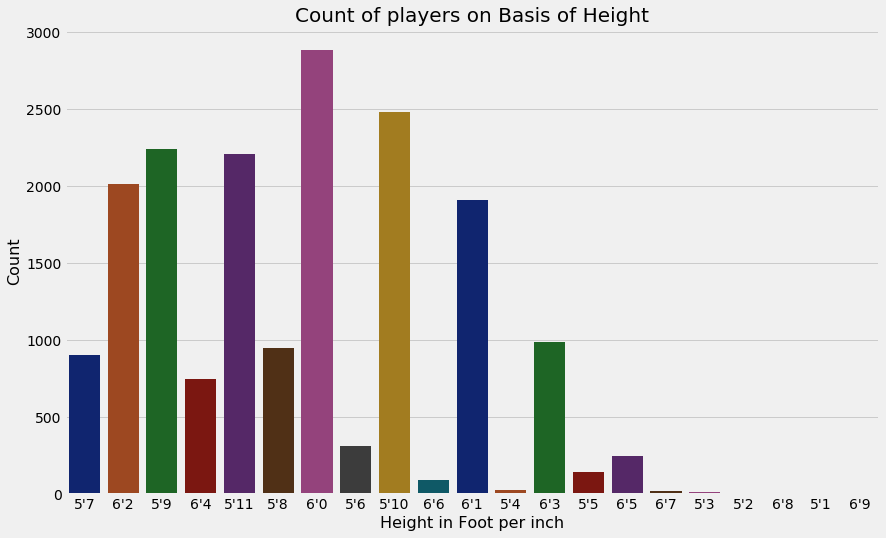

In [59]:
# 高度的球员

plt.figure(figsize = (13, 8))
ax = sns.countplot(x = 'Height', data = data, palette = 'dark')
ax.set_title(label = 'Count of players on Basis of Height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in Foot per inch', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

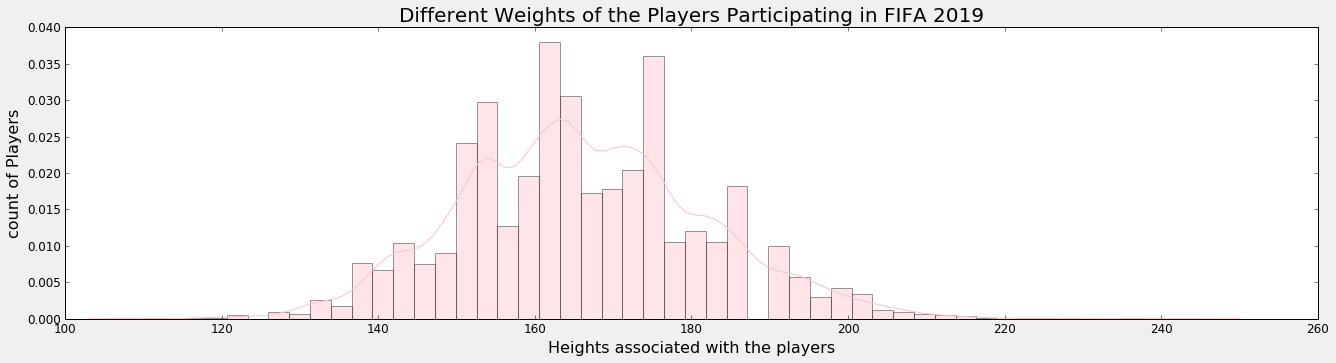

In [60]:
# 展示2019年国际足联参赛球员的不同体重

plt.figure(figsize = (20, 5))
plt.style.use('_classic_test')
sns.distplot(data['Weight'], color = 'pink')
plt.title('Different Weights of the Players Participating in FIFA 2019', fontsize = 20)
plt.xlabel('Heights associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

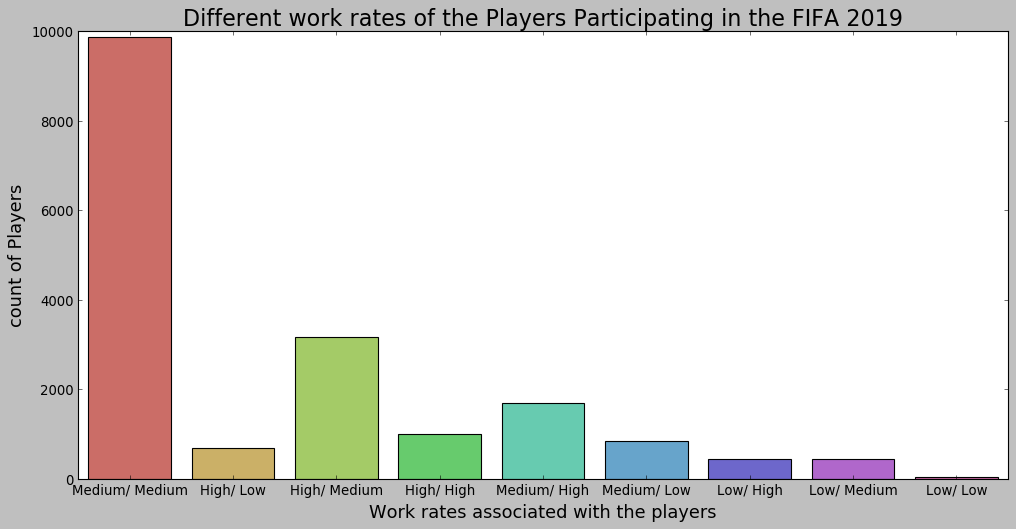

In [61]:
# 展示2019年国际足联参赛球员的不同工作效率

plt.figure(figsize = (15, 7))
plt.style.use('_classic_test')

sns.countplot(x = 'Work Rate', data = data, palette = 'hls')
plt.title('Different work rates of the Players Participating in the FIFA 2019', fontsize = 20)
plt.xlabel('Work rates associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

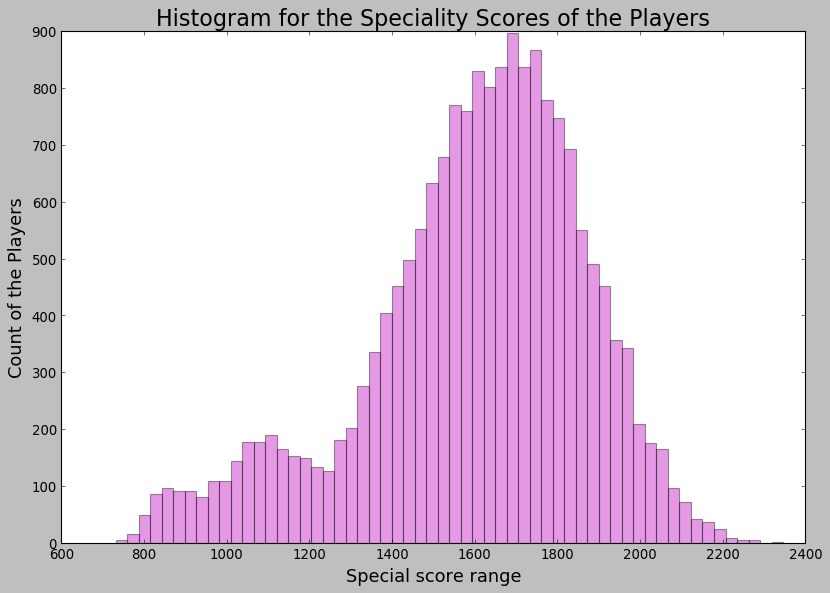

In [62]:
# 展示2019年国际足联参赛球员的不同专业分数

x = data.Special
plt.figure(figsize = (12, 8))
plt.style.use('tableau-colorblind10')

ax = sns.distplot(x, bins = 58, kde = False, color = 'm')
ax.set_xlabel(xlabel = 'Special score range', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of the Players',fontsize = 16)
ax.set_title(label = 'Histogram for the Speciality Scores of the Players', fontsize = 20)
plt.show()

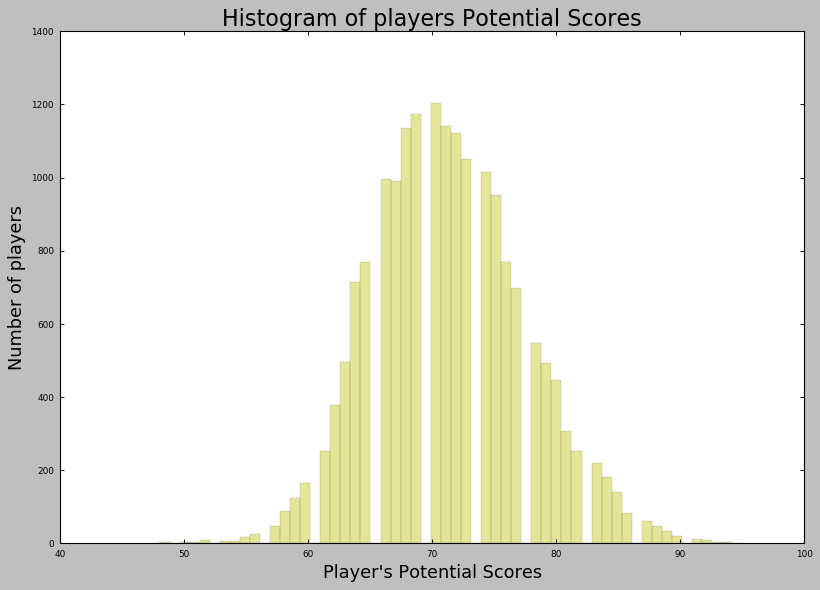

In [63]:
# 展示2019年国际足联参赛球员的不同潜在得分

x = data.Potential
plt.figure(figsize=(12,8))
plt.style.use('seaborn-paper')

ax = sns.distplot(x, bins = 58, kde = False, color = 'y')
ax.set_xlabel(xlabel = "Player\'s Potential Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players Potential Scores', fontsize = 20)
plt.show()

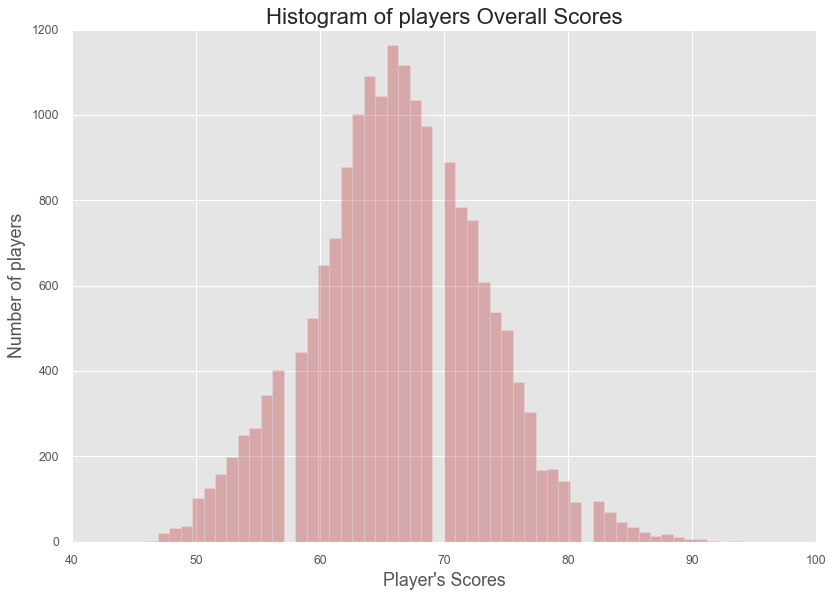

In [64]:
# 展示2019年国际足联参赛球员的不同总分

sns.set(style = "dark", palette = "deep", color_codes = True)
x = data.Overall
plt.figure(figsize = (12,8))
plt.style.use('ggplot')

ax = sns.distplot(x, bins = 52, kde = False, color = 'r')
ax.set_xlabel(xlabel = "Player\'s Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players Overall Scores', fontsize = 20)
plt.show()

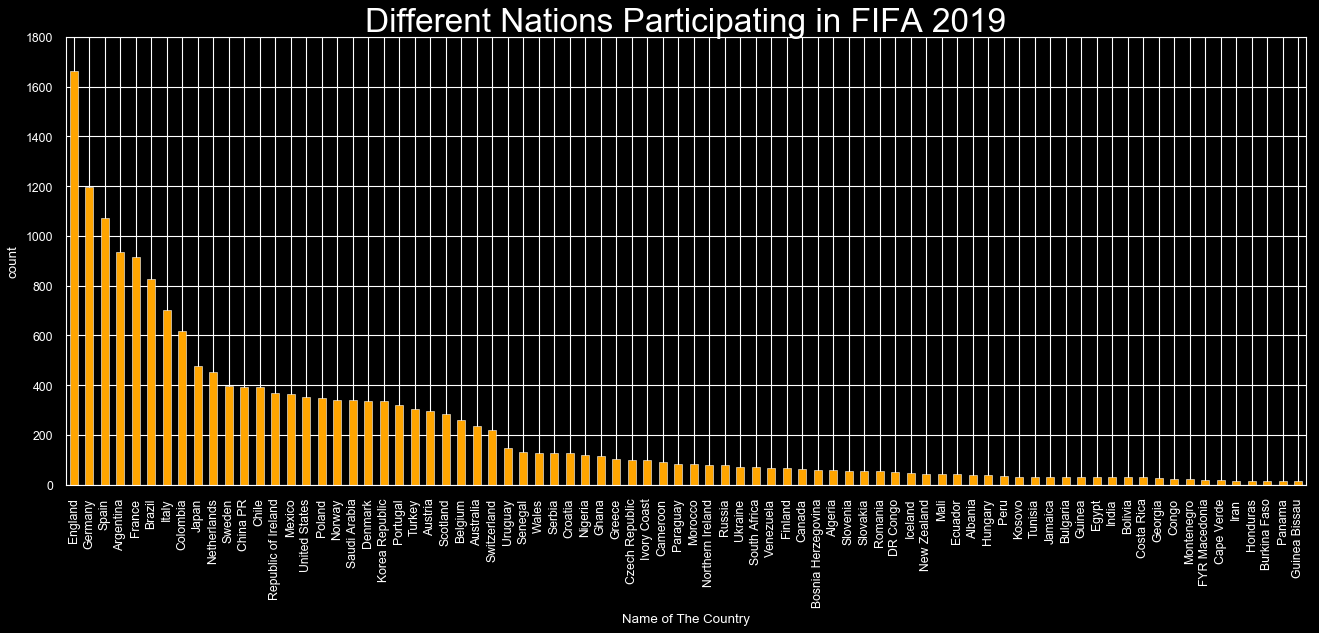

In [67]:
# 展示不同国家参加2019年国际足联

plt.style.use('dark_background')
data['Nationality'].value_counts().head(80).plot.bar(color = 'orange', figsize = (20, 7))
plt.title('Different Nations Participating in FIFA 2019', fontsize = 30, fontweight = 20)
plt.xlabel('Name of The Country')
plt.ylabel('count')
plt.show()

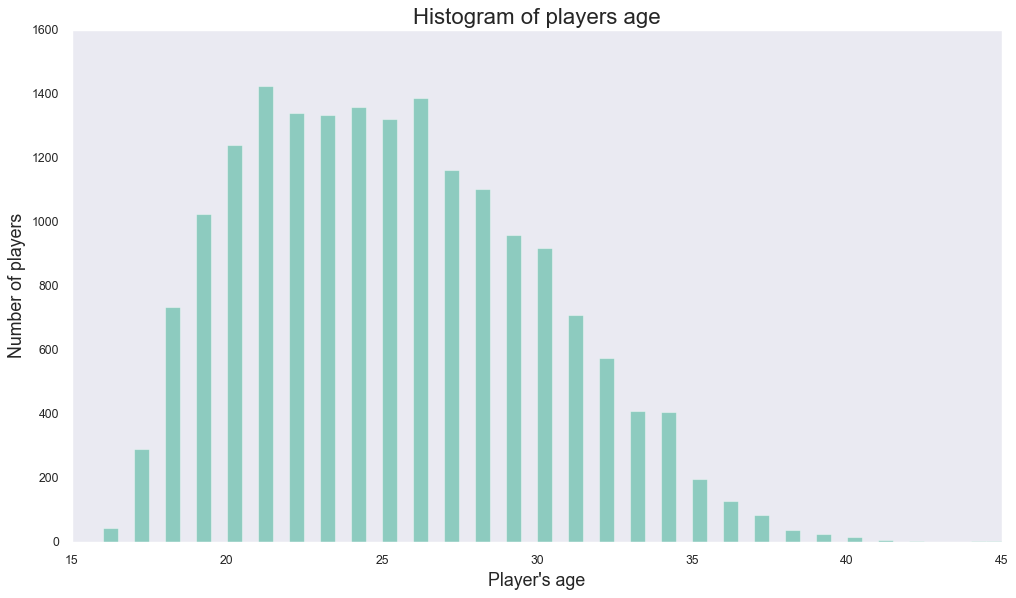

In [68]:
# 来表示有相同年龄的人
# 直方图:球员年龄的数量

sns.set(style = "dark", palette = "colorblind", color_codes = True)
x = data.Age
plt.figure(figsize = (15,8))
ax = sns.distplot(x, bins = 58, kde = False, color = 'g')
ax.set_xlabel(xlabel = "Player\'s age", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players age', fontsize = 20)
plt.show()

In [69]:
# 从给定数据集的一组列中选择一些有趣且重要的列

selected_columns = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
                    'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
                    'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Height', 'Weight',
                    'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                    'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                    'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                    'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                    'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                    'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                    'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']

data_selected = pd.DataFrame(data, columns = selected_columns)
data_selected.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Height', 'Weight', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')

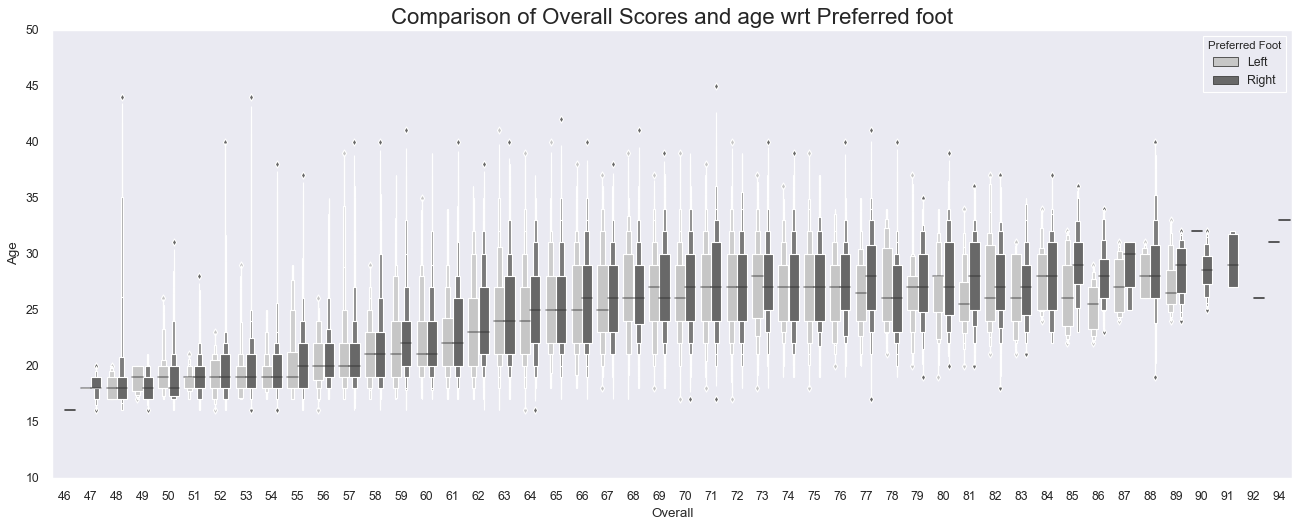

In [70]:
# 小提琴图

plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('seaborn-dark-palette')

sns.boxenplot(data['Overall'], data['Age'], hue = data['Preferred Foot'], palette = 'Greys')
plt.title('Comparison of Overall Scores and age wrt Preferred foot', fontsize = 20)
plt.show()

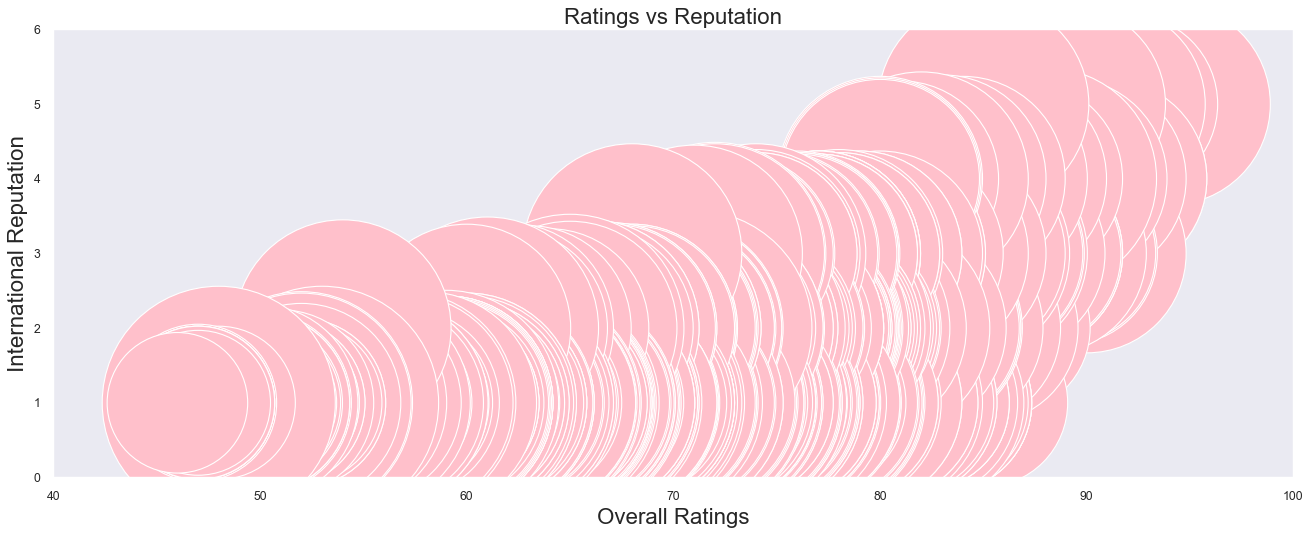

In [71]:
# 气泡图

plt.scatter(data['Overall'], data['International Reputation'], s = data['Age']*1000, c = 'pink')
plt.xlabel('Overall Ratings', fontsize = 20)
plt.ylabel('International Reputation', fontsize = 20)
plt.title('Ratings vs Reputation', fontweight = 20, fontsize = 20)
#plt.legend('Age', loc = 'upper left')
plt.show()

In [72]:
# 看一眼示例数据

data_selected.sample(5)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
16499,A. Mondal,28,India,57,57,No Club,0.0,0.0,1328,Right,...,48.0,51.0,55.0,58.0,13.0,15.0,15.0,11.0,10.0,0
10666,C. Munder,18,Cuba,65,76,Universidad Católica,850000.0,2000.0,1578,Right,...,57.0,32.0,32.0,26.0,14.0,13.0,7.0,10.0,9.0,€1.4M
11393,C. Wighton,20,Scotland,64,75,Heart of Midlothian,775000.0,2000.0,1553,Right,...,67.0,29.0,12.0,16.0,8.0,13.0,8.0,6.0,14.0,€1.5M
9068,D. Balanta,24,Colombia,66,72,Junior FC,750000.0,1000.0,1474,Right,...,54.0,58.0,66.0,72.0,13.0,11.0,7.0,8.0,12.0,€1.2M
13480,F. Baak,19,Germany,62,73,Hertha BSC,450000.0,2000.0,1390,Right,...,52.0,58.0,63.0,59.0,15.0,13.0,7.0,8.0,8.0,€855K


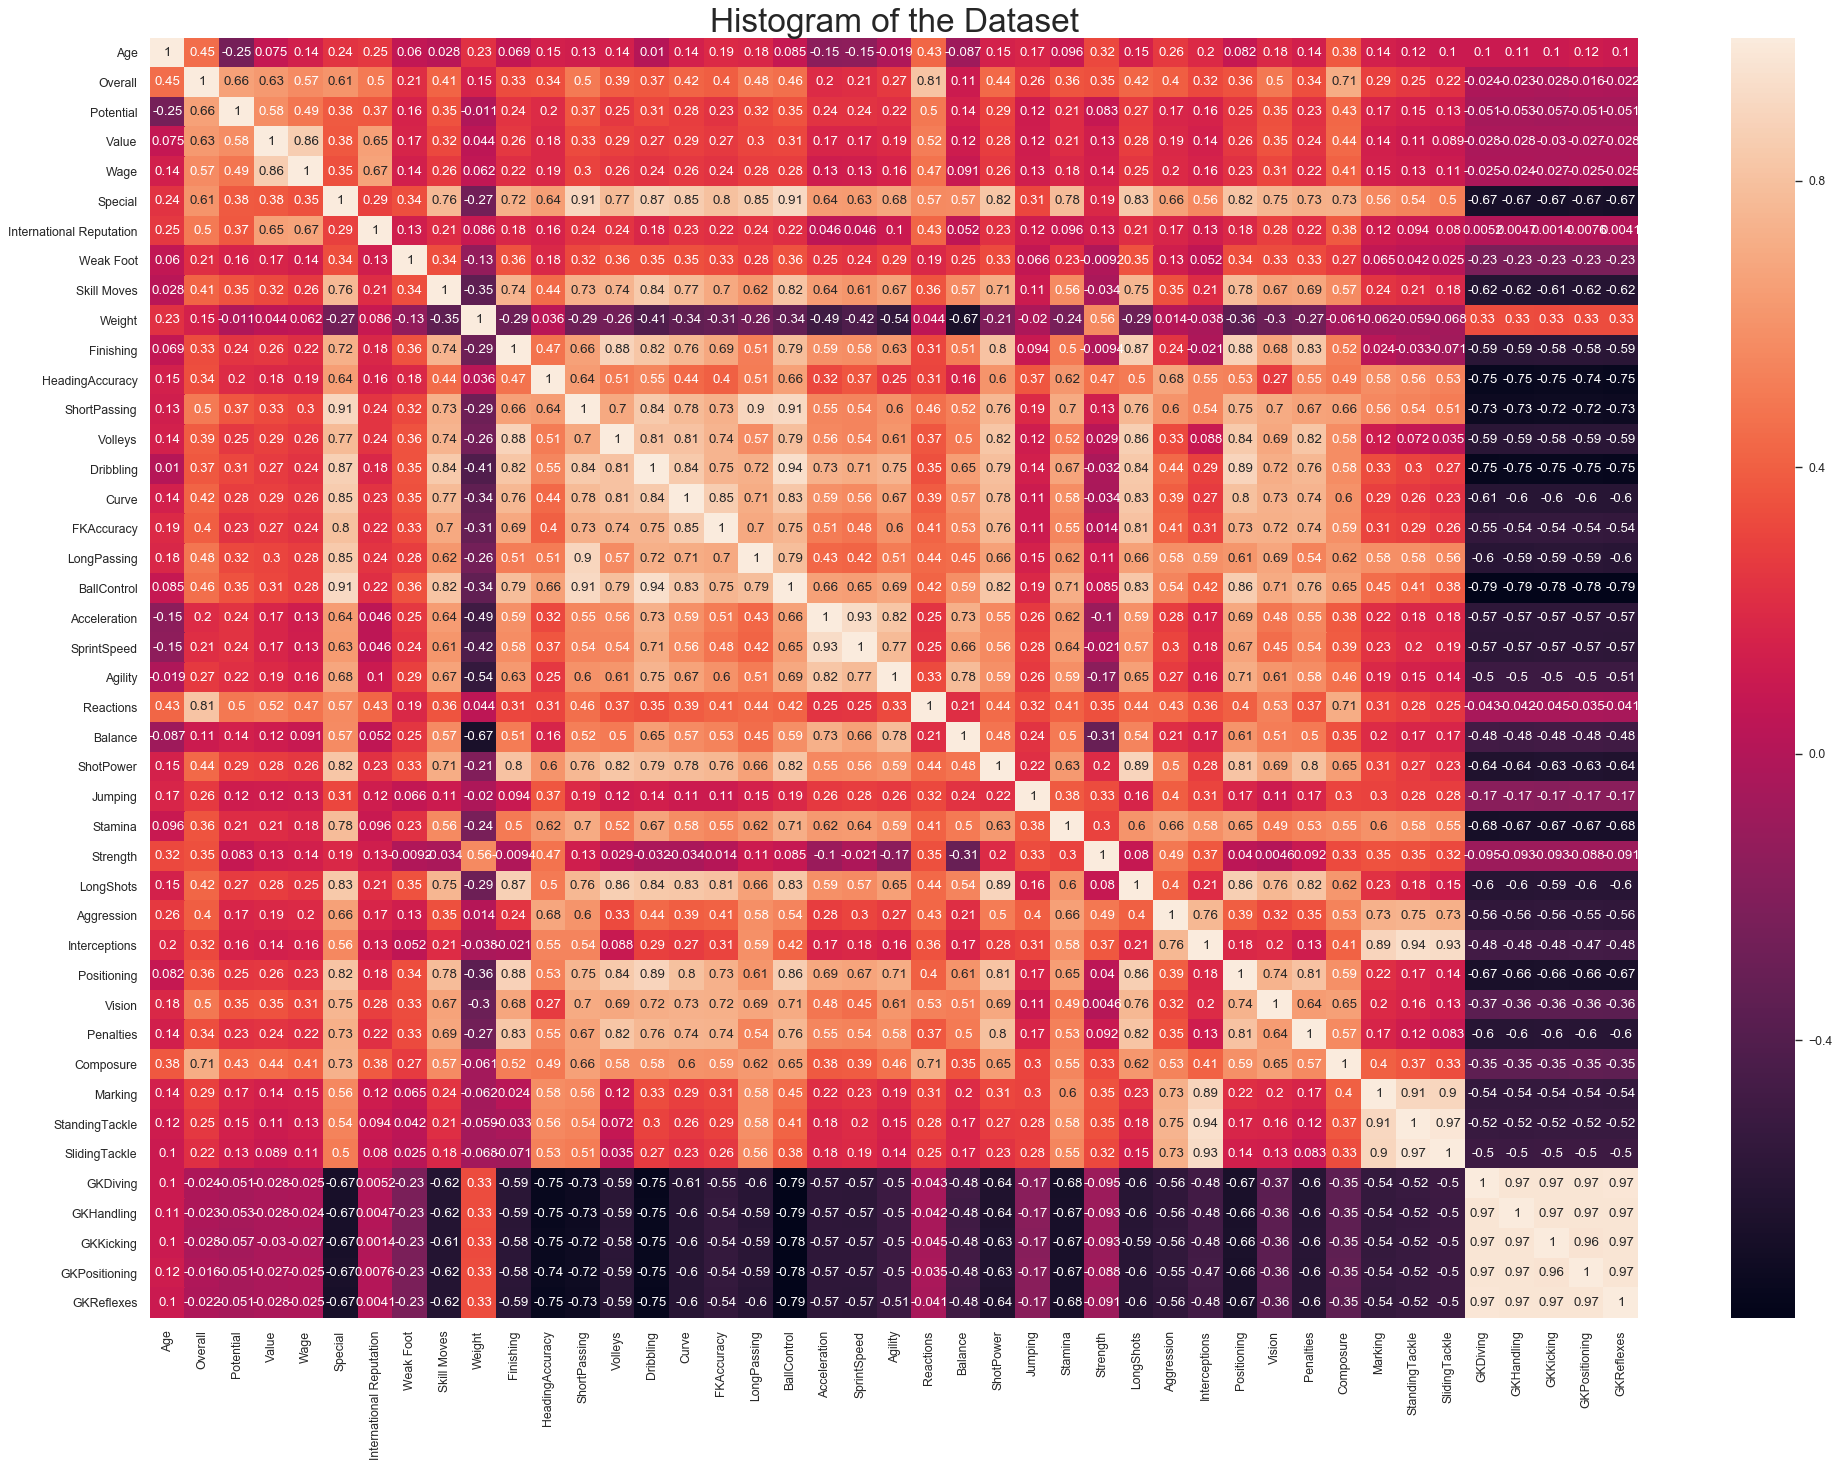

In [73]:
# 绘制相关热图

plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(data_selected[['Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
                    'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
                    'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Height', 'Weight',
                    'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                    'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                    'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                    'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                    'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                    'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                    'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']].corr(), annot = True)

plt.title('Histogram of the Dataset', fontsize = 30)
plt.show()

In [74]:
# 每个位置最佳球员的年龄、俱乐部和国籍取决于他们的总得分

data.iloc[data.groupby(data['Position'])['Overall'].idxmax()][['Position', 'Name', 'Age', 'Club', 'Nationality']]

,Position,Name,Age,Club,Nationality
17,CAM,A. Griezmann,27,Atlético Madrid,France
12,CB,D. Godín,32,Atlético Madrid,Uruguay
20,CDM,Sergio Busquets,29,FC Barcelona,Spain
271,CF,Luis Alberto,25,Lazio,Spain
67,CM,Thiago,27,FC Bayern München,Spain
3,GK,De Gea,27,Manchester United,Spain
28,LAM,J. Rodríguez,26,FC Bayern München,Colombia
35,LB,Marcelo,30,Real Madrid,Brazil
24,LCB,G. Chiellini,33,Juventus,Italy
11,LCM,T. Kroos,28,Real Madrid,Germany


In [75]:
# 每个位置最佳球员的年龄，国籍，俱乐部，根据他们的潜在得分

data.iloc[data.groupby(data['Position'])['Potential'].idxmax()][['Position', 'Name', 'Age', 'Club', 'Nationality']]

,Position,Name,Age,Club,Nationality
31,CAM,C. Eriksen,26,Tottenham Hotspur,Denmark
42,CB,S. Umtiti,24,FC Barcelona,France
27,CDM,Casemiro,26,Real Madrid,Brazil
350,CF,A. Milik,24,Napoli,Poland
78,CM,S. Milinković-Savić,23,Lazio,Serbia
3,GK,De Gea,27,Manchester United,Spain
28,LAM,J. Rodríguez,26,FC Bayern München,Colombia
35,LB,Marcelo,30,Real Madrid,Brazil
77,LCB,M. Škriniar,23,Inter,Slovakia
11,LCM,T. Kroos,28,Real Madrid,Germany


In [76]:
# 选择球员人数最多的国家来比较他们的整体分数

data['Nationality'].value_counts().head(8)

England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Brazil        827
Italy         702
Colombia      618
Name: Nationality, dtype: int64

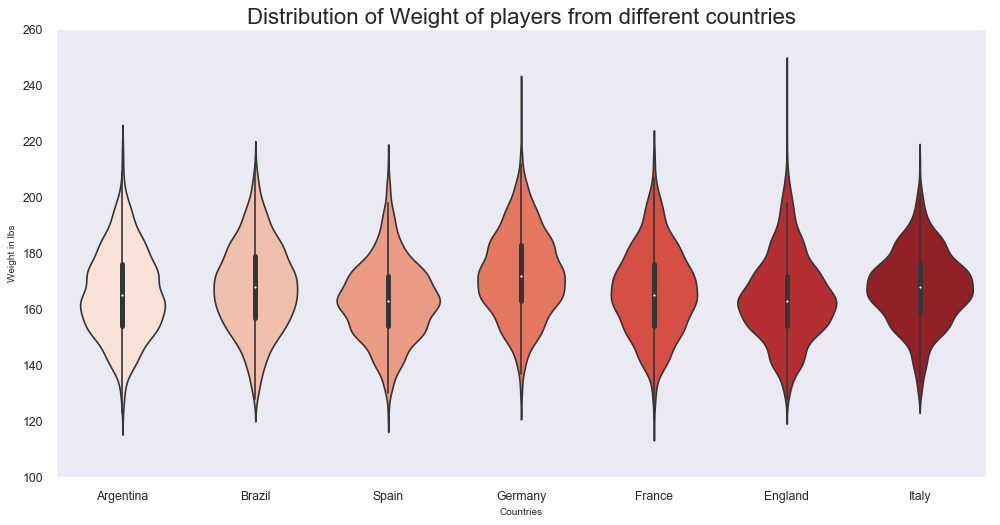

In [77]:
# 每个国家的运动员和他们的体重

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Weight']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.violinplot(x = data_countries['Nationality'], y = data_countries['Weight'], palette = 'Reds')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Weight in lbs', fontsize = 9)
ax.set_title(label = 'Distribution of Weight of players from different countries', fontsize = 20)
plt.show()

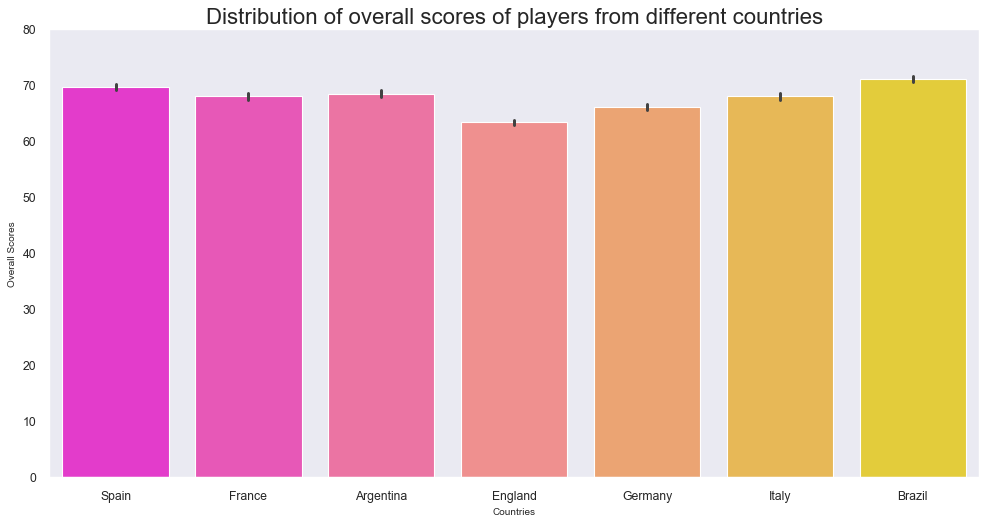

In [78]:
# 每个国家的球员和他们的整体得分

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Overall']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Overall'], palette = 'spring')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 9)
ax.set_title(label = 'Distribution of overall scores of players from different countries', fontsize = 20)
plt.show()


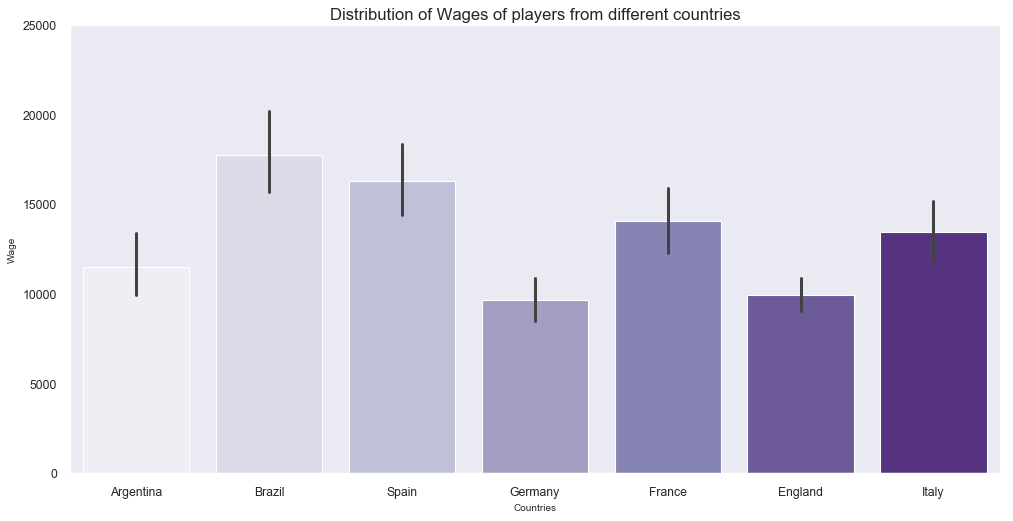

In [79]:
# 每个国家的球员和他们的工资

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Wage']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Wage'], palette = 'Purples')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Wage', fontsize = 9)
ax.set_title(label = 'Distribution of Wages of players from different countries', fontsize = 15)
plt.show()

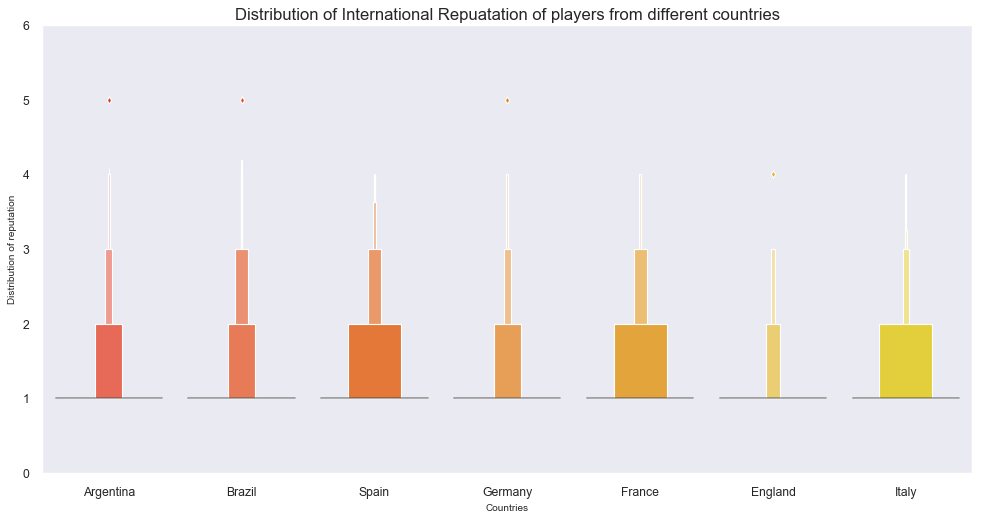

In [80]:
# 每个国家的球员和他们的国际声誉

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['International Reputation']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.boxenplot(x = data_countries['Nationality'], y = data_countries['International Reputation'], palette = 'autumn')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Distribution of reputation', fontsize = 9)
ax.set_title(label = 'Distribution of International Repuatation of players from different countries', fontsize = 15)
plt.show()

In [81]:
# 寻找全球最受欢迎的俱乐部

data['Club'].value_counts().head(10)

No Club                241
Rayo Vallecano          33
Chelsea                 33
Manchester United       33
Liverpool               33
TSG 1899 Hoffenheim     33
Arsenal                 33
Atlético Madrid         33
Burnley                 33
Manchester City         33
Name: Club, dtype: int64

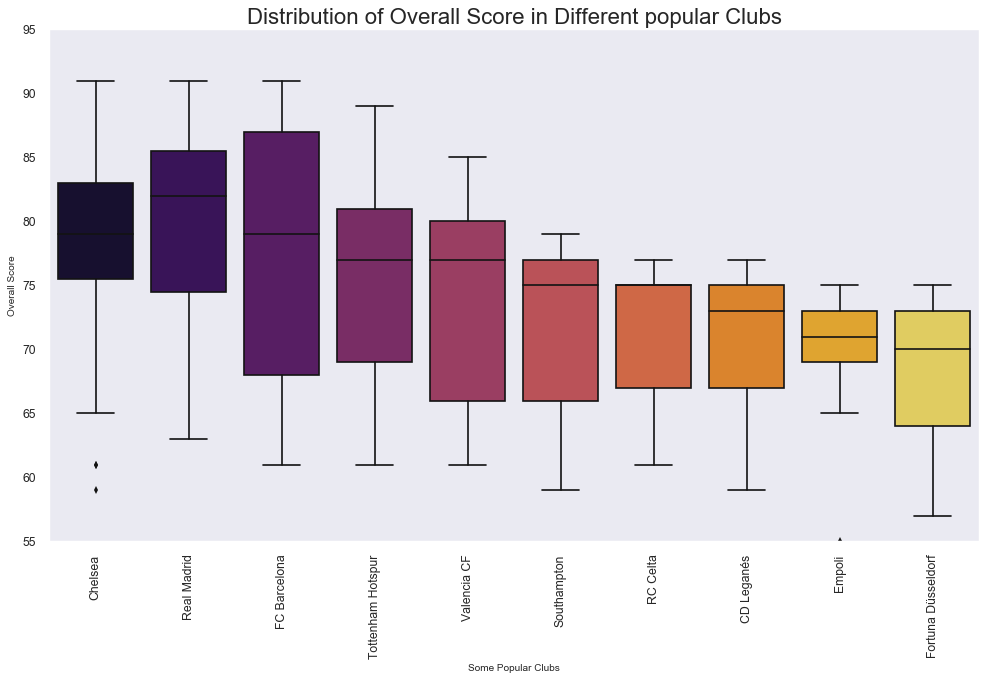

In [83]:
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Overall']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

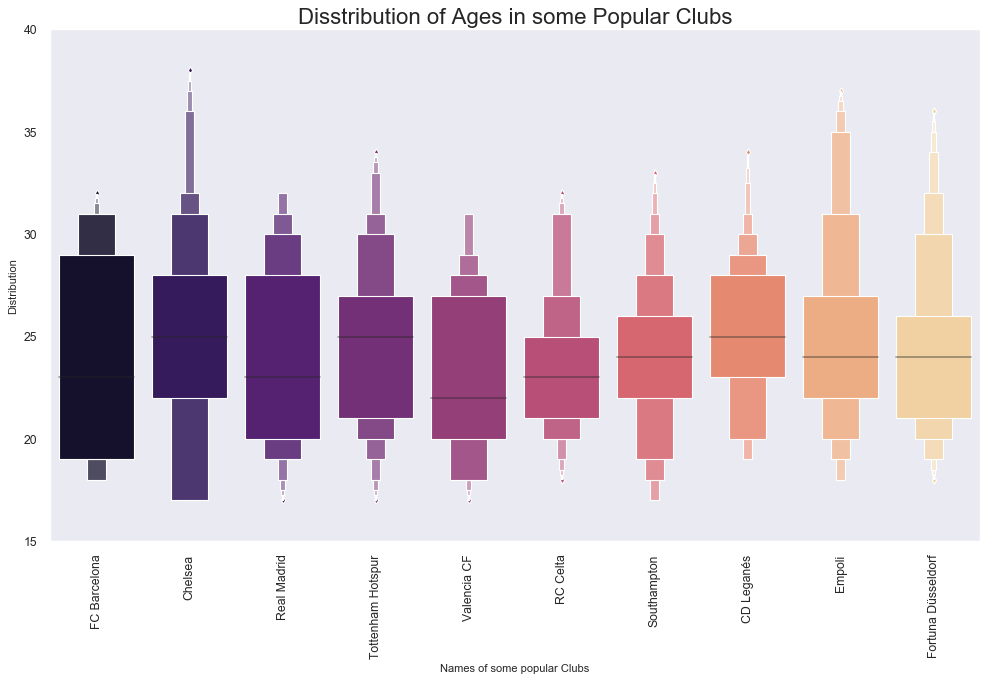

In [84]:
# 年龄分布在一些受欢迎的俱乐部

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club = data.loc[data['Club'].isin(some_clubs) & data['Wage']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxenplot(x = 'Club', y = 'Age', data = data_club, palette = 'magma')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Disstribution of Ages in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

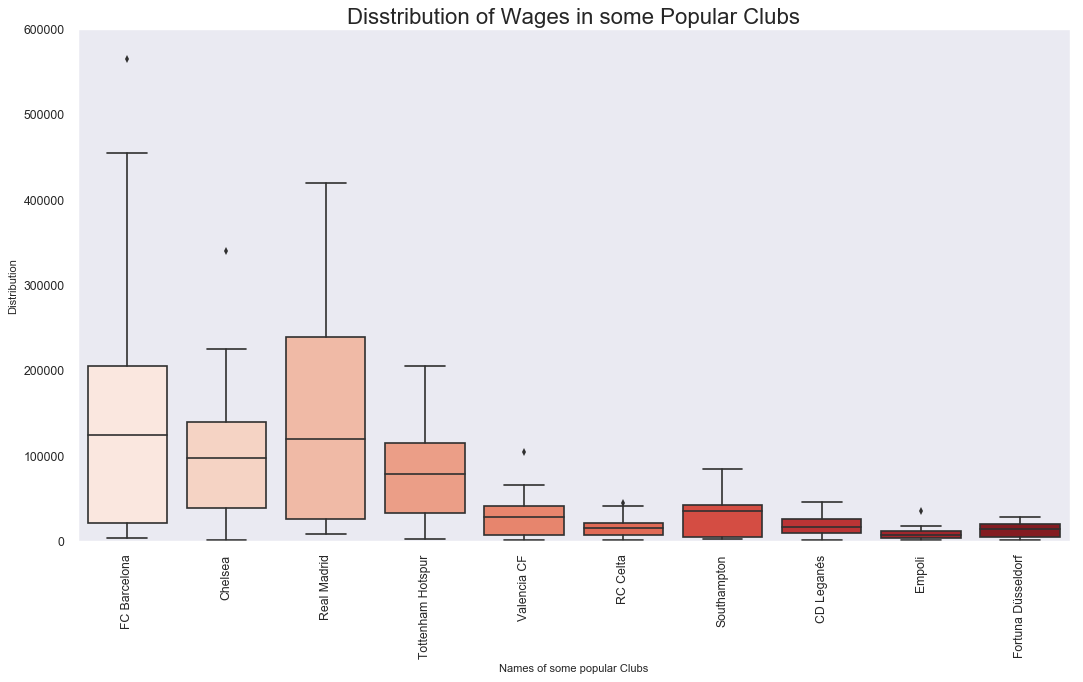

In [85]:
# 一些受欢迎的俱乐部的工资分配

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club = data.loc[data['Club'].isin(some_clubs) & data['Wage']]

plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.boxplot(x = 'Club', y = 'Wage', data = data_club, palette = 'Reds')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Disstribution of Wages in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

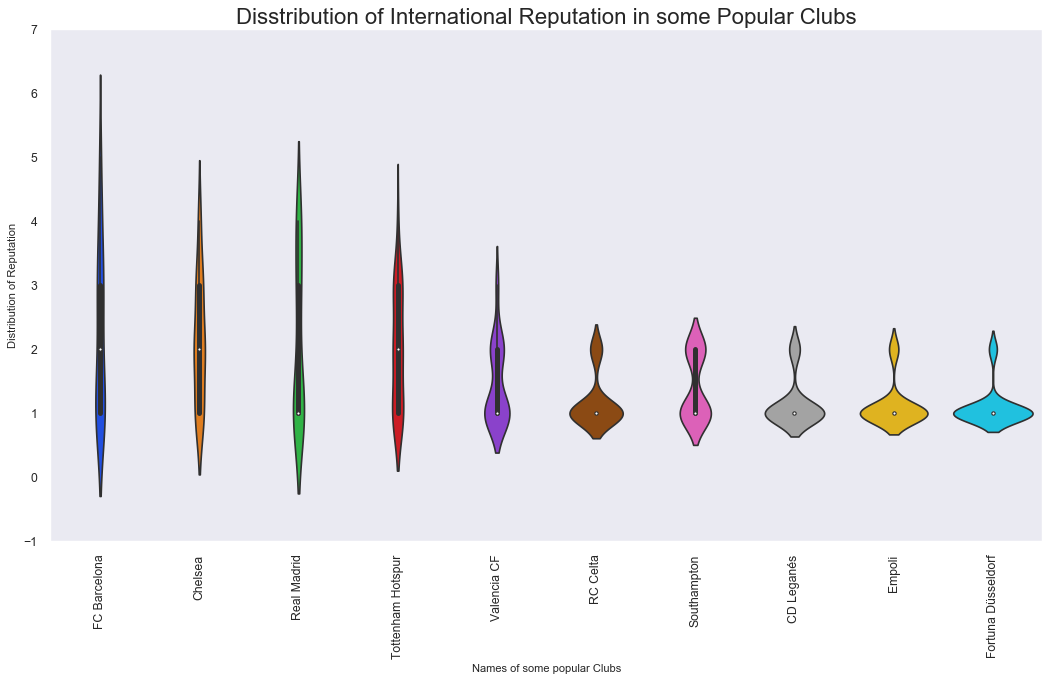

In [86]:
# 一些受欢迎的俱乐部的工资分配

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club = data.loc[data['Club'].isin(some_clubs) & data['International Reputation']]

plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.violinplot(x = 'Club', y = 'International Reputation', data = data_club, palette = 'bright')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution of Reputation', fontsize = 10)
ax.set_title(label = 'Disstribution of International Reputation in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

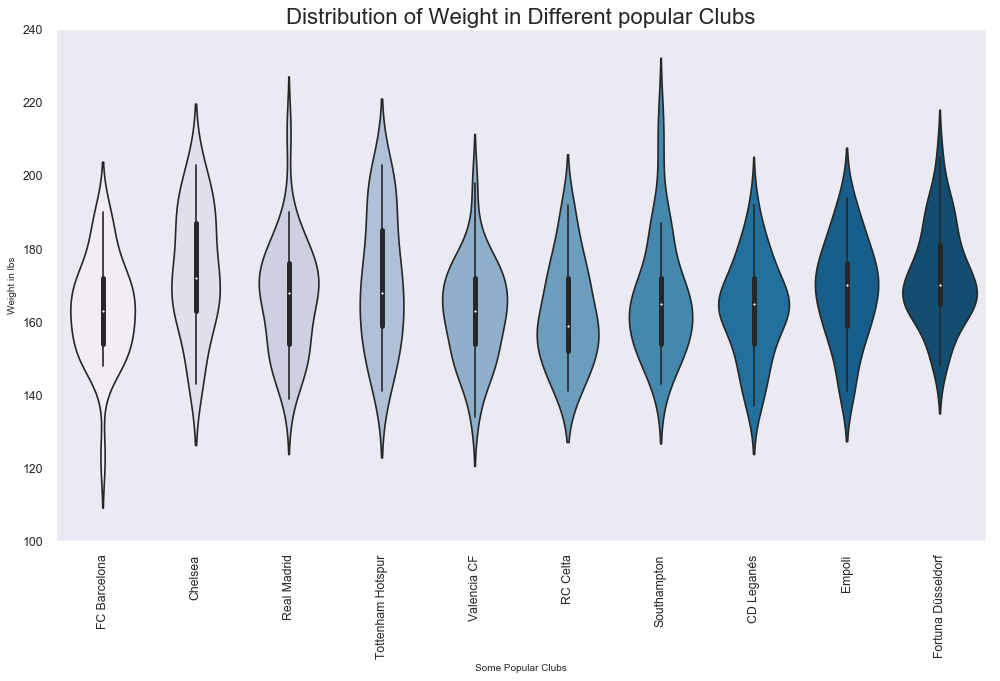

In [87]:
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Weight']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.violinplot(x = 'Club', y = 'Weight', data = data_clubs, palette = 'PuBu')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Weight in lbs', fontsize = 9)
ax.set_title(label = 'Distribution of Weight in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [88]:
# 从数据集中找到15个最年轻的玩家

youngest = data.sort_values('Age', ascending = True)[['Name', 'Age', 'Club', 'Nationality']].head(15)
print(youngest)

                 Name  Age               Club          Nationality
18206       G. Nugent   16    Tranmere Rovers              England
17743       J. Olstad   16    Sarpsborg 08 FF               Norway
13293     H. Massengo   16          AS Monaco               France
16081     J. Italiano   16        Perth Glory            Australia
18166        N. Ayéva   16          Örebro SK               Sweden
17712        K. Broda   16       Wisła Kraków               Poland
17354     L. D'Arrigo   16    Adelaide United            Australia
13567  Y. Verschaeren   16     RSC Anderlecht              Belgium
16927       B. Nygren   16       IFK Göteborg               Sweden
18018     B. O'Gorman   16     Bray Wanderers  Republic of Ireland
17091        A. Doğan   16        Kayserispor               Turkey
17115      C. Bassett   16    Colorado Rapids        United States
15793        J. Lahne   16  IF Brommapojkarna               Sweden
15746     Y. Begraoui   16         AJ Auxerre               Fr

In [89]:
# 从数据集中找到15个最老的玩家

eldest = data.sort_values('Age', ascending = False)[['Name', 'Age', 'Club', 'Nationality']].head(15)
print(eldest)

                  Name  Age                          Club        Nationality
4741          O. Pérez   45                       Pachuca             Mexico
18183    K. Pilkington   44              Cambridge United            England
17726        T. Warner   44            Accrington Stanley  Trinidad & Tobago
10545      S. Narazaki   42                Nagoya Grampus              Japan
7225          C. Muñoz   41  CD Universidad de Concepción          Argentina
1120         J. Villar   41                       No Club           Paraguay
12192     H. Sulaimani   41                     Ohod Club       Saudi Arabia
15426         M. Tyler   41           Peterborough United            England
4228          B. Nivet   41                  ESTAC Troyes             France
10356         F. Kippe   40                 Lillestrøm SK             Norway
16264  P. van der Vlag   40                      FC Emmen        Netherlands
9484       B. Castillo   40                Atlético Huila           Colombia

In [90]:
data['Joined'].head()

0     Jul 1, 2004
1    Jul 10, 2018
2     Aug 3, 2017
3     Jul 1, 2011
4    Aug 30, 2015
Name: Joined, dtype: object

In [91]:
# 俱乐部中服役最久的

import datetime

now = datetime.datetime.now()
data['Join_year'] = data.Joined.dropna().map(lambda x: x.split(',')[1].split(' ')[1])
data['Years_of_member'] = (data.Join_year.dropna().map(lambda x: now.year - int(x))).astype('int')
membership = data[['Name', 'Club', 'Years_of_member']].sort_values(by = 'Years_of_member', ascending = False).head(10)
membership.set_index('Name', inplace=True)
membership

,Club,Years_of_member
Name,,
O. Pérez,Pachuca,28
M. Al Shalhoub,Al Hilal,21
H. Sogahata,Kashima Antlers,21
M. Ogasawara,Kashima Antlers,21
S. Narazaki,Nagoya Grampus,20
M. Wölfli,BSC Young Boys,19
K. Kitamoto,Vissel Kobe,19
C. Källqvist,BK Häcken,18
Y. Endo,Gamba Osaka,18


In [92]:
# 定义球员特征

player_features = ('Acceleration', 'Aggression', 'Agility', 
                   'Balance', 'BallControl', 'Composure', 
                   'Crossing', 'Dribbling', 'FKAccuracy', 
                   'Finishing', 'GKDiving', 'GKHandling', 
                   'GKKicking', 'GKPositioning', 'GKReflexes', 
                   'HeadingAccuracy', 'Interceptions', 'Jumping', 
                   'LongPassing', 'LongShots', 'Marking', 'Penalties')

# 足球中每个位置的四大特点

for i, val in data.groupby(data['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(4).index)))

Position CAM: Balance, Agility, Acceleration
Position CB: Jumping, Aggression, HeadingAccuracy
Position CDM: Aggression, Jumping, Balance
Position CF: Agility, Balance, Acceleration
Position CM: Balance, Agility, Acceleration
Position GK: GKReflexes, GKDiving, GKPositioning
Position LAM: Agility, Balance, Acceleration
Position LB: Acceleration, Balance, Agility
Position LCB: Jumping, Aggression, HeadingAccuracy
Position LCM: Balance, Agility, BallControl
Position LDM: Aggression, BallControl, LongPassing
Position LF: Balance, Agility, Acceleration
Position LM: Acceleration, Agility, Balance
Position LS: Acceleration, Agility, Finishing
Position LW: Acceleration, Agility, Balance
Position LWB: Acceleration, Agility, Balance
Position RAM: Agility, Balance, Acceleration
Position RB: Acceleration, Balance, Jumping
Position RCB: Jumping, Aggression, HeadingAccuracy
Position RCM: Agility, Balance, BallControl
Position RDM: Aggression, Jumping, BallControl
Position RF: Agility, Acceleration, 

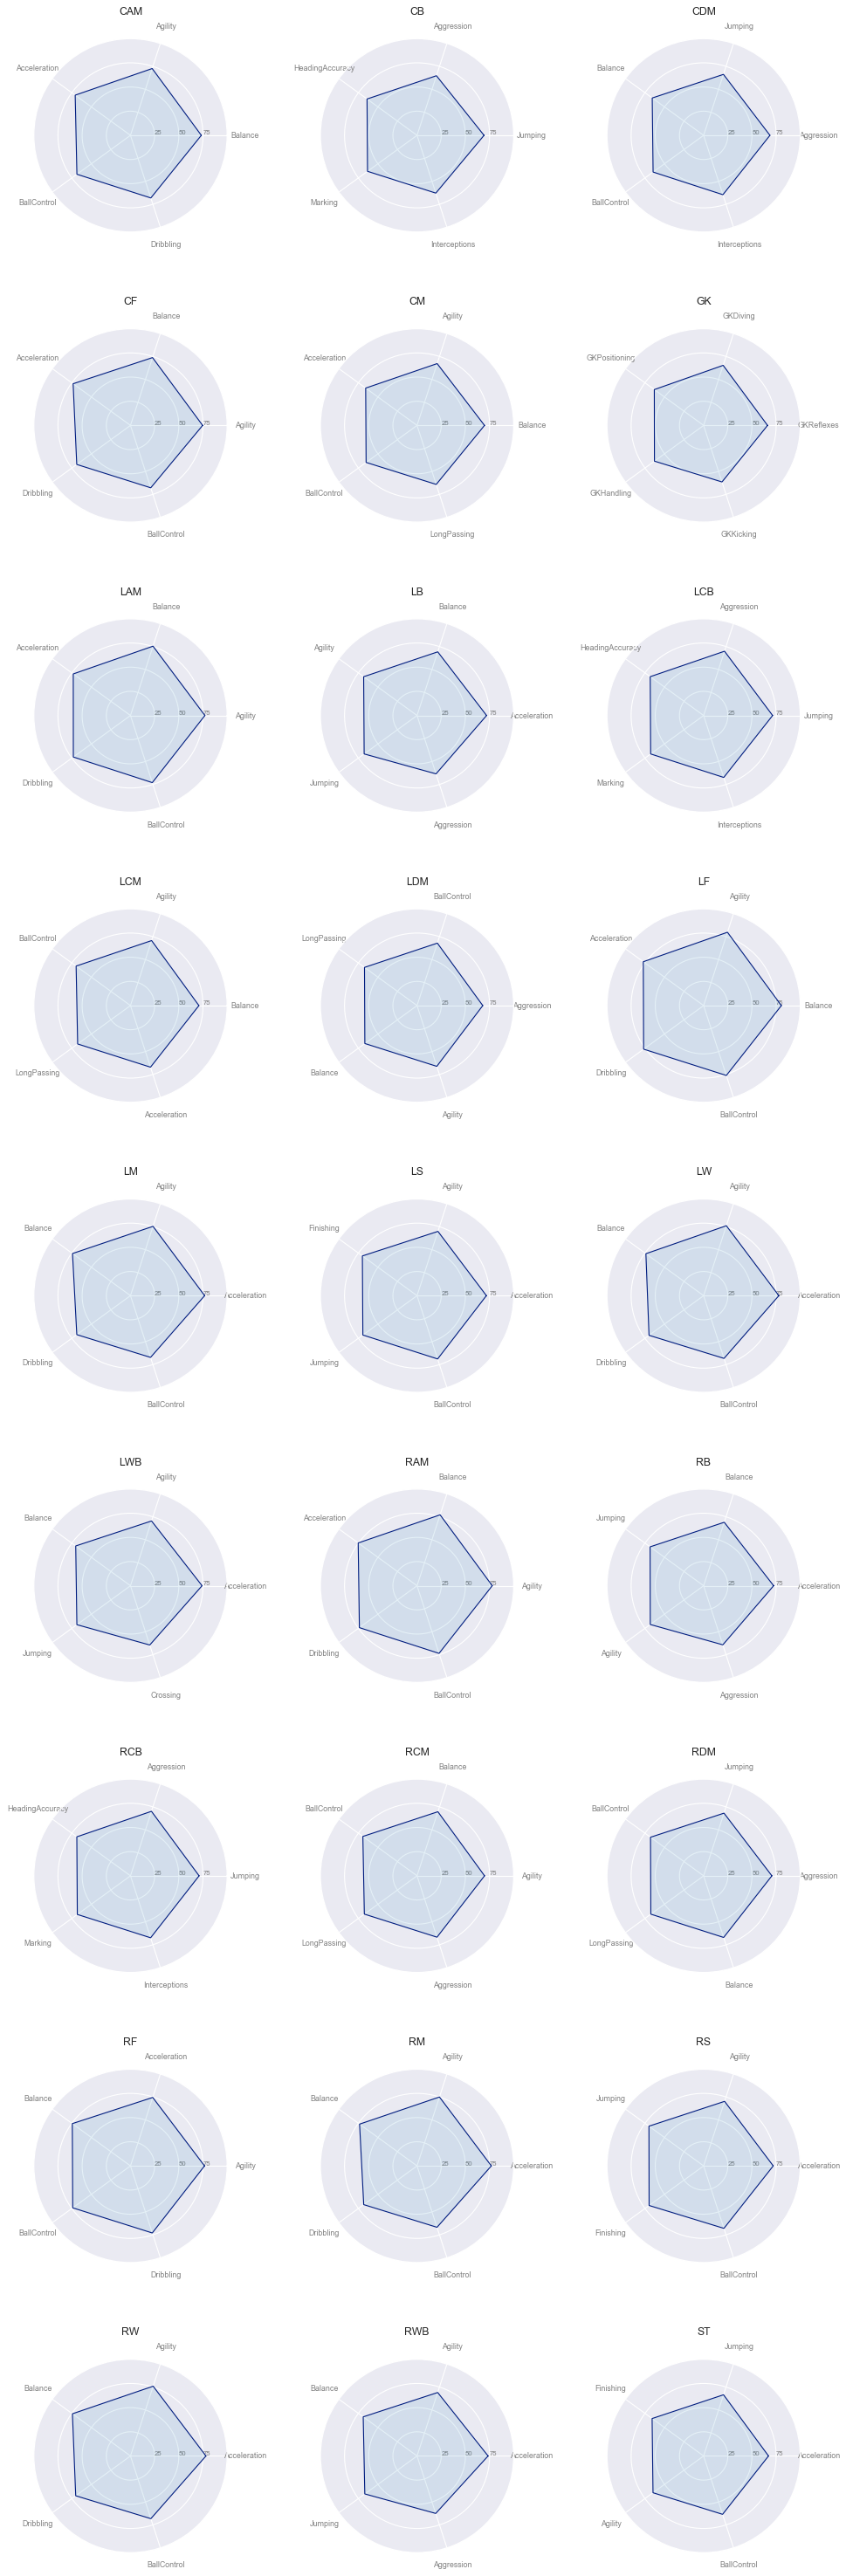

In [93]:
from math import pi

idx = 1
plt.figure(figsize=(15,45))
for position_name, features in data.groupby(data['Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    # number of variable
    categories=top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(9, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1 

In [94]:
# 十大左脚球员

data[data['Preferred Foot'] == 'Left'][['Name', 'Age', 'Club', 'Nationality']].head(10)

,Name,Age,Club,Nationality
0,L. Messi,31,FC Barcelona,Argentina
13,David Silva,32,Manchester City,Spain
15,P. Dybala,24,Juventus,Argentina
17,A. Griezmann,27,Atlético Madrid,France
19,T. Courtois,26,Real Madrid,Belgium
24,G. Chiellini,33,Juventus,Italy
26,M. Salah,26,Liverpool,Egypt
28,J. Rodríguez,26,FC Bayern München,Colombia
35,Marcelo,30,Real Madrid,Brazil
36,G. Bale,28,Real Madrid,Wales


In [95]:
# 十大右脚球员

data[data['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club', 'Nationality']].head(10)

,Name,Age,Club,Nationality
1,Cristiano Ronaldo,33,Juventus,Portugal
2,Neymar Jr,26,Paris Saint-Germain,Brazil
3,De Gea,27,Manchester United,Spain
4,K. De Bruyne,27,Manchester City,Belgium
5,E. Hazard,27,Chelsea,Belgium
6,L. Modrić,32,Real Madrid,Croatia
7,L. Suárez,31,FC Barcelona,Uruguay
8,Sergio Ramos,32,Real Madrid,Spain
9,J. Oblak,25,Atlético Madrid,Slovenia
10,R. Lewandowski,29,FC Bayern München,Poland


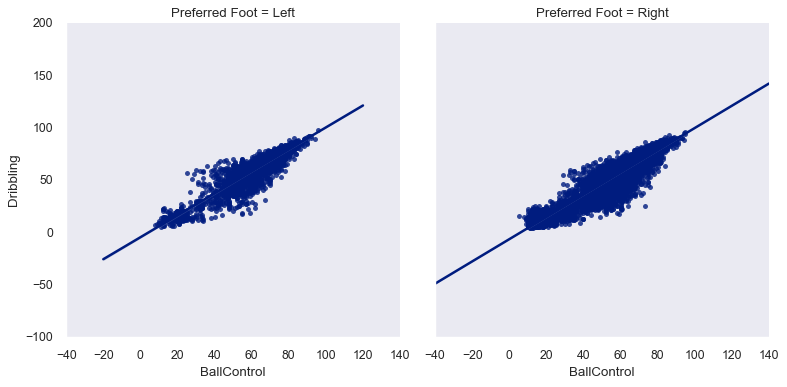

In [96]:
# 比较左脚和右脚球员的表现
# 控球vs控球

sns.lmplot(x = 'BallControl', y = 'Dribbling', data = data, col = 'Preferred Foot')
plt.show()

In [97]:
# 不同国家的数量最多的俱乐部

data.groupby(data['Club'])['Nationality'].nunique().sort_values(ascending = False).head(10)


Club
No Club                   28
Brighton & Hove Albion    21
Fulham                    19
Udinese                   18
Napoli                    18
Empoli                    18
Eintracht Frankfurt       18
West Ham United           18
AS Monaco                 18
Lazio                     18
Name: Nationality, dtype: int64

In [98]:
# 不同国家数目最多的俱乐部

data.groupby(data['Club'])['Nationality'].nunique().sort_values(ascending = True).head(10)


Club
Santos                       1
Ceará Sporting Club          1
América FC (Minas Gerais)    1
Paraná                       1
Chapecoense                  1
Padova                       1
Cittadella                   1
Sangju Sangmu FC             1
Ranheim Fotball              1
CA Osasuna                   1
Name: Nationality, dtype: int64

In [99]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club_Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

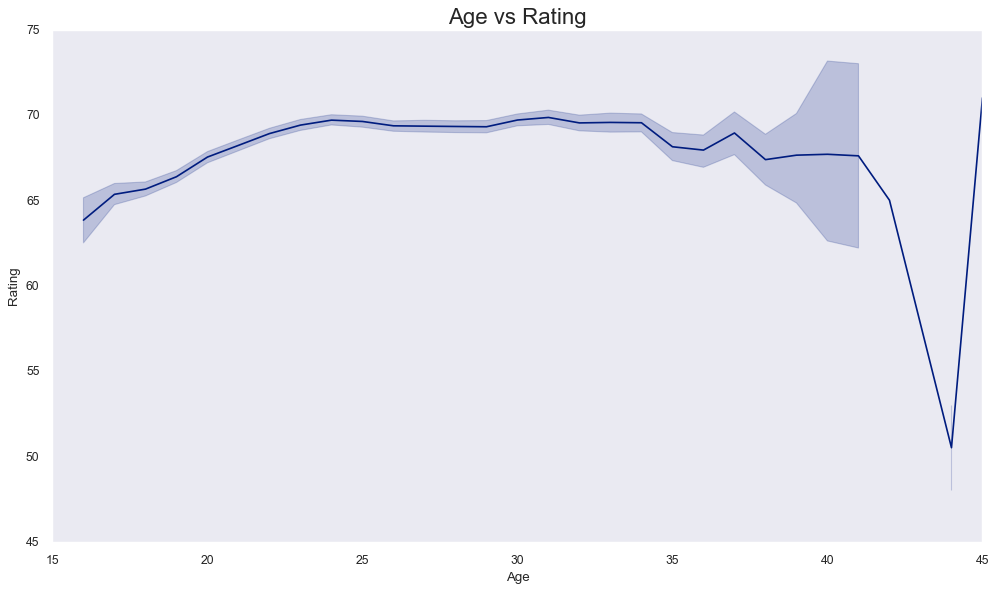

In [100]:
sns.lineplot(data['Age'], data['Rating'], palette = 'Wistia')
plt.title('Age vs Rating', fontsize = 20)

plt.show()

In [102]:
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected = True)
import plotly.graph_objs as go


In [103]:
rating = pd.DataFrame(data.groupby(['Nationality'])['Rating'].sum().reset_index())
count = pd.DataFrame(rating.groupby('Nationality')['Rating'].sum().reset_index())

trace = [go.Choropleth(
            colorscale = 'YlOrRd',
            locationmode = 'country names',
            locations = count['Nationality'],
            text = count['Nationality'],
            z = count['Rating'],
)]

layout = go.Layout(title = 'Country vs Ratings')

fig = go.Figure(data = trace, layout = layout)
py.iplot(fig)